# Visualising the Pattern

[*Emily Muller*](https://github.com/emilymuller1991)

We understand better the patterns in numbers by visualising them. We have multiple factors which can be used to encode information. For example:
 * Axis
 * Colour
 * Shape
 * Size


We can think of innovative ways to increase this like an added dimension or different line styles but we also don't want to burden the reader to perform extra layers of interpretation.

## How is the data encoded in the following visualisations?

<center><img src="https://www.visualcapitalist.com/wp-content/uploads/2020/05/How-Many-People-Die-Per-Day-Preview.jpg"></center>


<center><img src="https://www.visualcapitalist.com/wp-content/uploads/2020/05/tourism-countries-share.jpg"></center>


We are going to create our own data visualisations using data on covid cases by variant and by country. The data is from Kaggle [COVID-19 Variants Worldwide Evolution
Virus Variants Evolution (including Delta and Omicron) from Our World in Data](https://www.kaggle.com/gpreda/covid19-variants) and has been repurposed from [Data on COVID-19 (coronavirus) by Our World in Data](https://github.com/owid/covid-19-data/tree/master/public/data).


## Working with tabular data

Often our data lives in tables - in spreadsheets or in [CSV files](https://en.wikipedia.org/wiki/Comma-separated_values).

We like to arrange tabular data so that each *variable* has its own column, which is given a name in a *header row*:


|location|date|variant|num_sequences|
|---|---|---|---|
|Angola|2020-07-06|Alpha|0|
|Angola|2020-07-06|B.1.1.277|0|
|Angola|2020-07-06|B.1.1.302|0|
|Angola|2020-07-06|B.1.1.519|0|
|Angola|2020-07-06|B.1.160|0|


* `location` references which country the cases were recorded in.
* `date` is the date case was recorded.
* `variant` is the type of covid case.
* `num sequences` are the number of cases for the given country, on a given date, for a given variant.

In this example, the variables do not all have the same datatype. This makes it difficult to use directly as an `ndarray`. 

However, we can use the [pandas](https://pandas.pydata.org) package to work with tabular data in a more convenient way.



## `pandas`


Import `pandas` with

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Pandas is built around a fundamental data object called a [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html).

Here's how you can load data from a CSV file into a DataFrame:



In [83]:
covid_df = pd.read_csv('covid-variants-cases.csv')
covid_df.head()

,location,date,variant,num_sequences
0,Angola,2020-07-06,Alpha,0
1,Angola,2020-07-06,B.1.1.277,0
2,Angola,2020-07-06,B.1.1.302,0
3,Angola,2020-07-06,B.1.1.519,0
4,Angola,2020-07-06,B.1.160,0


In [84]:
covid_df.shape

(100416, 4)

### Extracting a series

To extract a single column from the DataFrame, use `[]` :

In [85]:
cases = covid_df['num_sequences']

In [86]:
cases.max(), cases.argmax()

(142280, 97571)

In [87]:
covid_df.iloc[97571]

location         United States
date                2021-08-09
variant                  Delta
num_sequences           142280
Name: 97571, dtype: object

### Filtering by value

To filter a DataFrame by one of the column values, use `query()` :

In [88]:
covid_df.query("variant == 'Delta'").head()

,location,date,variant,num_sequences
11,Angola,2020-07-06,Delta,0
35,Angola,2020-08-31,Delta,0
59,Angola,2020-09-28,Delta,0
83,Angola,2020-10-12,Delta,0
107,Angola,2020-10-26,Delta,0


In [89]:
# this is equivalent to:
covid_df[covid_df['variant'] == 'Delta'].head()

,location,date,variant,num_sequences
11,Angola,2020-07-06,Delta,0
35,Angola,2020-08-31,Delta,0
59,Angola,2020-09-28,Delta,0
83,Angola,2020-10-12,Delta,0
107,Angola,2020-10-26,Delta,0


## In this next section, we will use covid cases and variants by country and time to examine the following research questions:
 * Which variants had the greatest detection record globally and when did this occur?
 * How do cases of these variants differ across different countries?

### Groupby 

For the first question, we are not interested in examining individual countries. We can therefore take the sum of cases over all countries. We can do this using groupby:


In [90]:
# groupby creates a new dataframe with an index 'date'. By calling .sum(), the dataframe populates numeric columns with the sum over the specified index
# in this case, country and variant have been conditioned out of the summation.
covid_df.groupby('date').sum().head()

,num_sequences
date,
2020-05-11,32872
2020-05-25,25806
2020-06-08,19320
2020-06-22,32320
2020-07-06,31528


### Plot Total Variants across Time

First we'll extract the names of all the variants:

In [91]:
variants = covid_df['variant'].unique()
variants

array(['Alpha', 'B.1.1.277', 'B.1.1.302', 'B.1.1.519', 'B.1.160',
       'B.1.177', 'B.1.221', 'B.1.258', 'B.1.367', 'B.1.620', 'Beta',
       'Delta', 'Epsilon', 'Eta', 'Gamma', 'Iota', 'Kappa', 'Lambda',
       'Mu', 'Omicron', 'S:677H.Robin1', 'S:677P.Pelican', 'others',
       'non_who'], dtype=object)

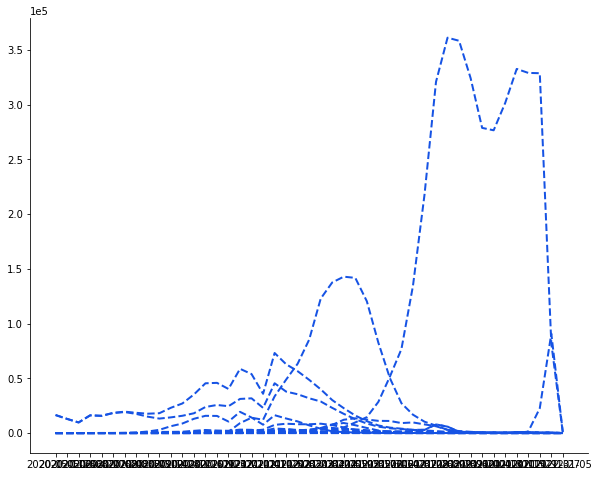

In [92]:
# Create a new figure of size 6 by 4 inches (width and height)
plt.figure(figsize=(10, 8))

# loop through variants
for variant in variants:
    # query data from variant
    variant_df = covid_df[covid_df['variant'] == variant]

    # get time series dataframe of variants summed over all countries
    variant_time = variant_df.groupby('date').sum()

    # plot time-series for this variant
    plt.plot(variant_time.index,   variant_time["num_sequences"],   color="#1653E4", linestyle="--", linewidth=2, label="Delta")
plt.show()

## How can we format this graph for better data visualisation?

 * show each variant in a different colour
 * format the x-axis to show date
 * plot legend
 * show variants with largest cumulative counts (top5)
 * remove top and right borders 
 * add titles and axis

## Remove top and right axis globally

In [94]:
# format axis globally to remove right and top borders and allow for scientific notation of y-scale
import matplotlib as mpl
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

# scientific notation
mpl.rcParams['axes.formatter.limits'] = (-2,2)

## Get variants with highest total counts

In [95]:
# get only the variants with highest counts
total_variants = covid_df.groupby('variant').sum()
total_variants.head()

,num_sequences
variant,
Alpha,1132595
B.1.1.277,1183
B.1.1.302,486
B.1.1.519,22825
B.1.160,34019


In [96]:
top_variants = total_variants['num_sequences'].nlargest(5).index
top_variants

Index(['Delta', 'Alpha', 'non_who', 'others', 'B.1.177'], dtype='object', name='variant')

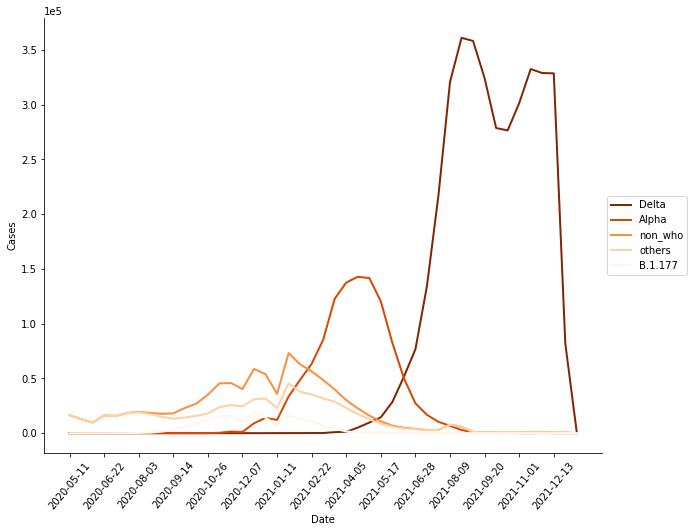

In [97]:
# Create a new figure of size 6 by 4 inches (width and height)
plt.figure(figsize=(10, 8))

# colormap
cmap = plt.get_cmap('Oranges_r')
colors = [cmap(i) for i in np.linspace(0, 1, 5)]

for i, variant in enumerate(top_variants):
    # query data from variant
    variant_df = covid_df[covid_df['variant'] == variant]

    # get time series dataframe of variants summed over all countries
    variant_time = variant_df.groupby('date').sum()

    # plot time-series for this variant
    plt.plot(variant_time.index,   variant_time["num_sequences"], color=colors[i],  linestyle="-", linewidth=2, label=variant)

# x axis ticks
plt.xticks(rotation=50)
# reduce number of ticks
plt.xticks(np.arange(0, len(variant_time.index), 3.0))
# legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# titles
plt.xlabel('Date')
plt.ylabel('Cases')
plt.show()

### Plot Total Variants across Time for each Country
We will choose the countries with highest number of cases

In [98]:
top_countries = covid_df.groupby('location').sum()['num_sequences'].nlargest(3).index

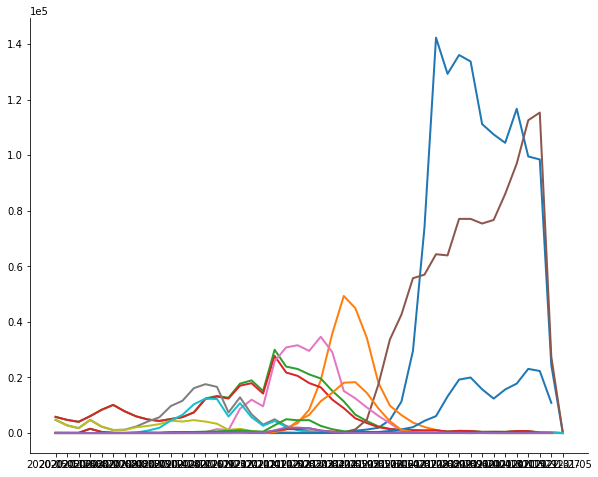

In [99]:
# Create a new figure of size 6 by 4 inches (width and height)
plt.figure(figsize=(10, 8))

for i, country in enumerate(top_countries):
    for j, variant in enumerate(top_variants):
        # query data from variant
        variant_df = covid_df[covid_df['variant'] == variant]

        # query country from variant_df
        variant_country_df = variant_df[variant_df['location'] == country]

        # get time series dataframe of variants summed over all countries
        time_df = variant_country_df.groupby('date').sum()

        # plot time-series for this variant and country
        plt.plot(time_df.index,  time_df["num_sequences"], linestyle='-', linewidth=2)

## Even after we add two dimensions of information - colour and shape, there is still a lot of information on one graph

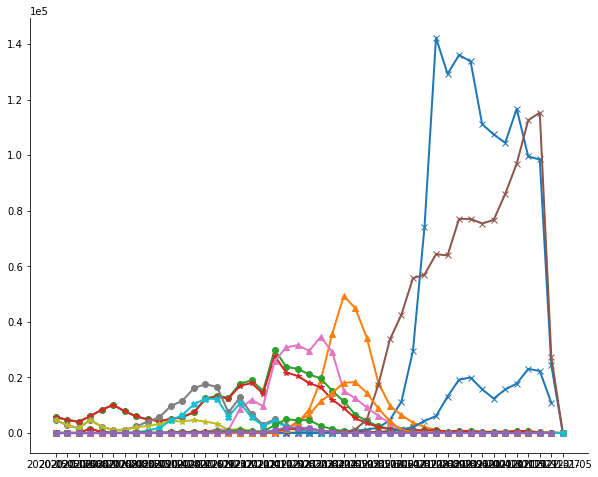

In [100]:
# Create a new figure of size 6 by 4 inches (width and height)
plt.figure(figsize=(10, 8))

# markers
markers = ['x', '^', 'o', '*', 'X']

for i, country in enumerate(top_countries):
    for j, variant in enumerate(top_variants):
        # query data from variant
        variant_df = covid_df[covid_df['variant'] == variant]

        # query country from variant_df
        variant_country_df = variant_df[variant_df['location'] == country]

        # get time series dataframe of variants summed over all countries
        time_df = variant_country_df.groupby('date').sum()

        # plot time-series for this variant and country
        plt.plot(time_df.index,  time_df["num_sequences"], marker = markers[j], linestyle='-', linewidth=2)

## We'll instead plot each country on a separate subplot

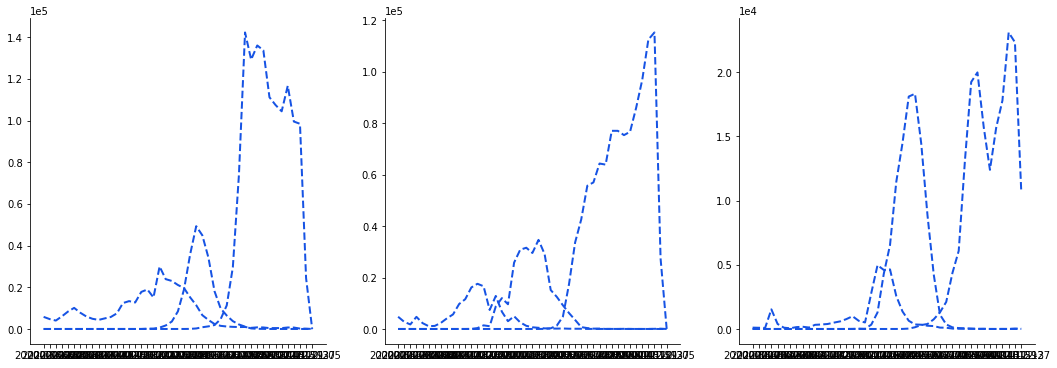

In [101]:
# plot instead on 3 subplots
# Create a new figure of size 18 by 6 inches (width and height) with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,6))

ax = [ax1, ax2, ax3] 

for (i,country) in enumerate(top_countries[:3]):
    for (j,variant) in enumerate(top_variants[:3]):
        # query data from variant
        variant_df = covid_df[covid_df['variant'] == variant]
        
        # query country from variant_df
        variant_country_df = variant_df[variant_df['location'] == country]

        # get time series dataframe of variants summed over all countries
        time_df = variant_country_df.groupby('date').sum()
        
        # plot time-series for this variant
        ax[i].plot(time_df.index,  time_df["num_sequences"], color="#1653E4", linestyle="--", linewidth=2)

## How can we format this graph for better data visualisation? 

 * align the axis so it's all on the same scale
 * show each variant in a different colour
 * format the x-axis to show date
 * plot legend
 * add titles and axis

### In the previous question we formatting using plt. In the next section we will format the axes individually by calling functions from the ax. object. 

## Complete the formatting by filling in values for A, B, C, D, E, F, G & H

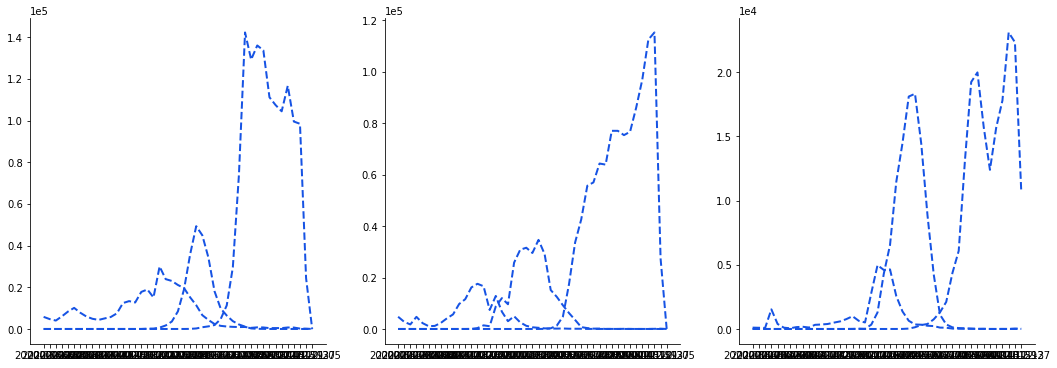

In [102]:
# plot instead on 3 subplots
# Create a new figure of size 18 by 6 inches (width and height) with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,6))

ax = [ax1, ax2, ax3] 

for (i,country) in enumerate(top_countries[:3]):
    for (j,variant) in enumerate(top_variants[:3]):
        # query data from variant
        variant_df = covid_df[covid_df['variant'] == variant]
        
        # query country from variant_df
        variant_country_df = variant_df[variant_df['location'] == country]

        # get time series dataframe of variants summed over all countries
        time_df = variant_country_df.groupby('date').sum()
        
        # plot time-series for this variant
        ax[i].plot(time_df.index,  time_df["num_sequences"], color="#1653E4", linestyle="--", linewidth=2, label=variant)

        # ax[i].title.set_text(H) # FILL

# # scale y axis
# for axes in ax:
#     axes.set_ylim((A,B)) # FILL

#     # reduce number of ticks
#     axes.set_xticks(np.arange(0, len(time_df.index), C)) # FILL


# # set legend
# ax3.legend(loc='D', bbox_to_anchor=(1, 0.5)) # FILL

# # rotate axis
# fig.autofmt_xdate(rotation=E) # FILL

# # titles
# ax2.set_xlabel('F') # FILL
# ax1.set_ylabel('G') # FILL
# plt.show()